In [1]:
# Import libraries
import os
import time
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.linear_model import LinearRegression, LogisticRegression, LogisticRegressionCV
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split, cross_validate
from sklearn.metrics import r2_score, confusion_matrix, classification_report, roc_curve
from sklearn.metrics import roc_auc_score, precision_recall_curve, average_precision_score
import warnings
warnings.filterwarnings("ignore")
plt.style.use('seaborn-notebook')
sns.set_style('darkgrid')
# pandas tricks for better display
pd.options.display.max_columns = 50  
pd.options.display.max_rows = 500     
pd.options.display.max_colwidth = 100
pd.options.display.precision = 3

In [2]:
# load data
df = pd.read_csv('../data/diabetic_data_processed.csv', na_values='?')

# examine first 5 rows of dataframe
print(f'Shape of diabetic data: {df.shape}\n')
display(df.head())

Shape of diabetic data: (69990, 86)



,patient_nbr,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,payer_code,medical_specialty,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,diag_1,diag_2,diag_3,number_diagnoses,max_glu_serum,A1Cresult,metformin,repaglinide,nateglinide,...,mean_diagnoses,min_diagnoses,max_diagnoses,unique_glu_measurements,avg_times_glu_high,num_times_glu_high,glu_always_high,glu_ever_high,unique_a1c_results,avg_times_a1c_high,num_times_a1c_high,a1c_always_high,a1c_ever_high,avg_times_med_changed,num_times_med_changed,med_always_changed,med_ever_changed,avg_times_diabetic_med_prescribed,num_times_diabetic_med_prescribed,diabetic_med_always_prescribed,diabetic_med_ever_prescribed,avg_times_readmitted,num_times_readmitted,always_readmitted,ever_readmitted
0,135,Caucasian,Female,[50-60),Emergency,Home,Emergency Room,3,UNK,Other,31,1,14,0,0,1,injury,other,neoplasms,5,UNK,UNK,Steady,No,No,...,6.5,5,8,1,0.0,0,0,0,1,0.0,0,0,0,1.0,2,1,1,1.0,2,1,1,0.5,1,0,1
1,378,Caucasian,Female,[50-60),Elective,Home,Physician Referral,2,UNK,Other,49,1,11,0,0,0,musculoskeletal,other,neoplasms,3,UNK,UNK,No,No,No,...,3.0,3,3,1,0.0,0,0,0,1,0.0,0,0,0,0.0,0,0,0,0.0,0,0,0,0.0,0,0,0
2,729,Caucasian,Female,[80-100),Emergency,SNF,Emergency Room,4,MC,InternalMedicine,68,2,23,0,0,0,injury,respiratory,Einjury,9,UNK,>7,Steady,No,No,...,9.0,9,9,1,0.0,0,0,0,1,0.0,0,0,0,0.0,0,0,0,1.0,1,1,1,0.0,0,0,0
3,774,Caucasian,Female,[80-100),Emergency,Home,Emergency Room,3,UNK,InternalMedicine,46,0,20,0,0,0,neoplasms,other,other,9,UNK,>8,Steady,No,No,...,9.0,9,9,1,0.0,0,0,0,1,1.0,1,1,1,1.0,1,1,1,1.0,1,1,1,0.0,0,0,0
4,927,AfricanAmerican,Female,[0-50),Emergency,Home,Emergency Room,5,UNK,InternalMedicine,49,0,5,0,0,0,genitournary,neoplasms,neoplasms,3,UNK,UNK,No,No,No,...,3.0,3,3,1,0.0,0,0,0,1,0.0,0,0,0,0.0,0,0,0,1.0,1,1,1,0.0,0,0,0


In [3]:
df.head()

,patient_nbr,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,payer_code,medical_specialty,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,diag_1,diag_2,diag_3,number_diagnoses,max_glu_serum,A1Cresult,metformin,repaglinide,nateglinide,...,mean_diagnoses,min_diagnoses,max_diagnoses,unique_glu_measurements,avg_times_glu_high,num_times_glu_high,glu_always_high,glu_ever_high,unique_a1c_results,avg_times_a1c_high,num_times_a1c_high,a1c_always_high,a1c_ever_high,avg_times_med_changed,num_times_med_changed,med_always_changed,med_ever_changed,avg_times_diabetic_med_prescribed,num_times_diabetic_med_prescribed,diabetic_med_always_prescribed,diabetic_med_ever_prescribed,avg_times_readmitted,num_times_readmitted,always_readmitted,ever_readmitted
0,135,Caucasian,Female,[50-60),Emergency,Home,Emergency Room,3,UNK,Other,31,1,14,0,0,1,injury,other,neoplasms,5,UNK,UNK,Steady,No,No,...,6.5,5,8,1,0.0,0,0,0,1,0.0,0,0,0,1.0,2,1,1,1.0,2,1,1,0.5,1,0,1
1,378,Caucasian,Female,[50-60),Elective,Home,Physician Referral,2,UNK,Other,49,1,11,0,0,0,musculoskeletal,other,neoplasms,3,UNK,UNK,No,No,No,...,3.0,3,3,1,0.0,0,0,0,1,0.0,0,0,0,0.0,0,0,0,0.0,0,0,0,0.0,0,0,0
2,729,Caucasian,Female,[80-100),Emergency,SNF,Emergency Room,4,MC,InternalMedicine,68,2,23,0,0,0,injury,respiratory,Einjury,9,UNK,>7,Steady,No,No,...,9.0,9,9,1,0.0,0,0,0,1,0.0,0,0,0,0.0,0,0,0,1.0,1,1,1,0.0,0,0,0
3,774,Caucasian,Female,[80-100),Emergency,Home,Emergency Room,3,UNK,InternalMedicine,46,0,20,0,0,0,neoplasms,other,other,9,UNK,>8,Steady,No,No,...,9.0,9,9,1,0.0,0,0,0,1,1.0,1,1,1,1.0,1,1,1,1.0,1,1,1,0.0,0,0,0
4,927,AfricanAmerican,Female,[0-50),Emergency,Home,Emergency Room,5,UNK,InternalMedicine,49,0,5,0,0,0,genitournary,neoplasms,neoplasms,3,UNK,UNK,No,No,No,...,3.0,3,3,1,0.0,0,0,0,1,0.0,0,0,0,0.0,0,0,0,1.0,1,1,1,0.0,0,0,0


looking at relationship between each categorical variable and the response variable.

In [4]:

# Set the option to display all columns and set the display width
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)


# Print the data types of all columns


# print(df.dtypes)

object_columns = df.select_dtypes(include=['object']).columns
print(object_columns)


Index(['race', 'gender', 'age', 'admission_type_id',
       'discharge_disposition_id', 'admission_source_id', 'payer_code',
       'medical_specialty', 'diag_1', 'diag_2', 'diag_3', 'max_glu_serum',
       'A1Cresult', 'metformin', 'repaglinide', 'nateglinide',
       'chlorpropamide', 'glimepiride', 'acetohexamide', 'glipizide',
       'glyburide', 'tolbutamide', 'pioglitazone', 'rosiglitazone', 'acarbose',
       'miglitol', 'troglitazone', 'tolazamide', 'examide', 'citoglipton',
       'insulin', 'glyburide-metformin', 'glipizide-metformin',
       'glimepiride-pioglitazone', 'metformin-rosiglitazone',
       'metformin-pioglitazone'],
      dtype='object')


In [5]:
type(object_columns[[1]])

pandas.core.indexes.base.Index

In [6]:
for col in object_columns:
    print(col)

race
gender
age
admission_type_id
discharge_disposition_id
admission_source_id
payer_code
medical_specialty
diag_1
diag_2
diag_3
max_glu_serum
A1Cresult
metformin
repaglinide
nateglinide
chlorpropamide
glimepiride
acetohexamide
glipizide
glyburide
tolbutamide
pioglitazone
rosiglitazone
acarbose
miglitol
troglitazone
tolazamide
examide
citoglipton
insulin
glyburide-metformin
glipizide-metformin
glimepiride-pioglitazone
metformin-rosiglitazone
metformin-pioglitazone


readmitted            0      1
race                          
AfricanAmerican  96.310  3.690
Asian            94.632  5.368
Caucasian        94.675  5.325
Hispanic         95.171  4.829
Other            95.431  4.569
UNK              96.595  3.405
readmitted             0      1
gender                         
Female            95.134  4.866
Male              94.940  5.060
Unknown/Invalid  100.000    NaN
readmitted       0      1
age                      
[0-50)      96.829  3.171
[50-60)     96.396  3.604
[60-70)     94.887  5.113
[70-80)     94.166  5.834
[80-100)    93.655  6.345
readmitted              0      1
admission_type_id               
Elective           95.845  4.155
Emergency          94.911  5.089
Other              93.809  6.191
Urgent             95.261  4.739
readmitted                     0      1
discharge_disposition_id               
Home                      96.281  3.719
Home w/ Service           94.339  5.661
Other                     92.749  7.251
SNF         

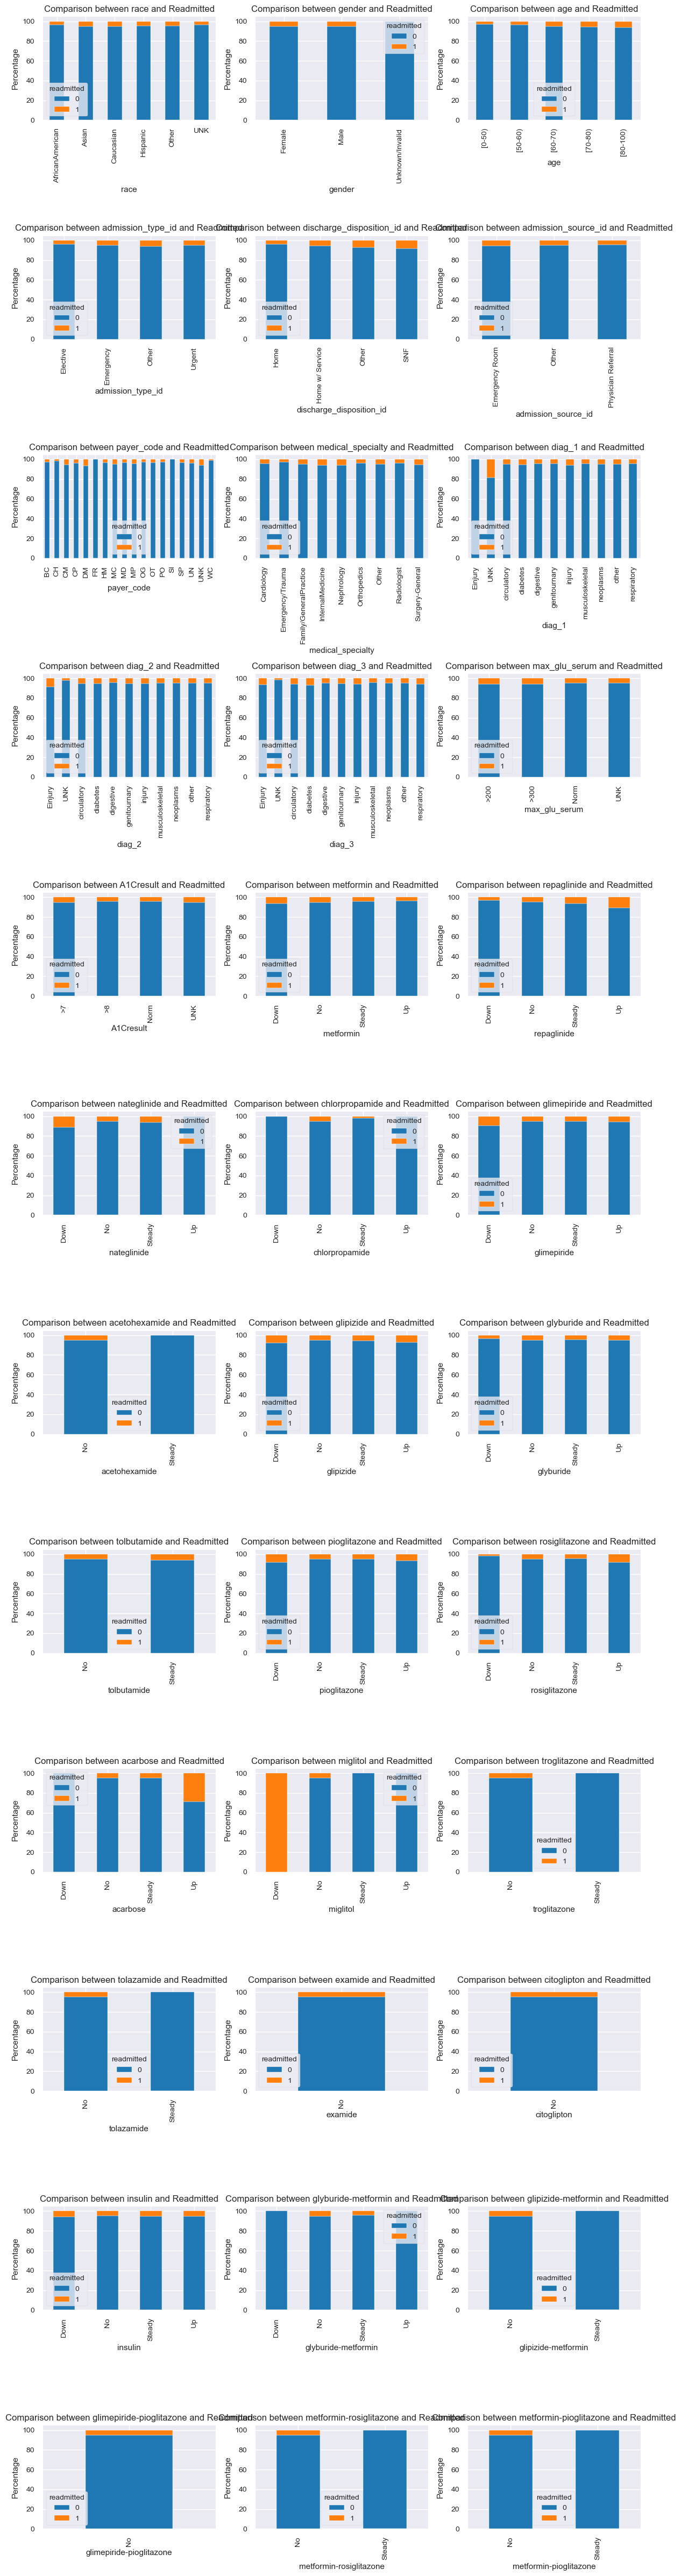

In [7]:
n_cols = 3  # You can choose the number of columns in your grid
n_rows = (len(object_columns) + n_cols - 1) // n_cols  # This ensures you have enough rows

# Create a figure and a set of subplots
fig, axes = plt.subplots(n_rows, n_cols, figsize=(4 * n_cols, 4 * n_rows))
fig.tight_layout(pad=5.0)

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Iterate over the columns and create a bar plot for each
for i, col in enumerate(object_columns):
    # Group by the current column and 'readmitted', then count occurrences
    grouped_data = df.groupby([col, 'readmitted']).size().unstack()
    grouped_data_percentages = grouped_data.div(grouped_data.sum(axis=1), axis=0) * 100
    print(grouped_data_percentages)

    # Plotting on the designated subplot
    grouped_data_percentages.plot(kind='bar', stacked=True, ax=axes[i])
    axes[i].set_title(f"Comparison between {col} and Readmitted")
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Percentage')

# Hide any unused axes if the number of object columns isn't a multiple of n_cols
for j in range(i + 1, len(axes)):
    axes[j].axis('off')

# Adjust layout to prevent overlap
plt.tight_layout()

# Show the plot
plt.show()

In [8]:

# for col in object_columns:

#     # Group by the current column and 'readmitted', then count occurrences
#     grouped_data = df.groupby([col, 'readmitted']).size().unstack()
#     grouped_data_percentages = grouped_data.div(grouped_data.sum(axis=1), axis=0) * 100
#     print(grouped_data_percentages)
#     # Plotting
#     grouped_data.plot(kind='bar', stacked=True)
#     plt.title(f"Comparison between {col} and Readmitted")
#     plt.xlabel(col)
#     plt.ylabel(col)
#     plt.show()

In [9]:
int_columns=df.select_dtypes(['int']).drop('patient_nbr', axis=1).columns

corelation coef between time_in_hospital and readmitted is : 0.04942828050774179
corelation coef between num_lab_procedures and readmitted is : 0.04939732893160397
corelation coef between num_procedures and readmitted is : -0.007931851973218971
corelation coef between num_medications and readmitted is : 0.03761175108803213
corelation coef between number_outpatient and readmitted is : 0.021585694017650713
corelation coef between number_emergency and readmitted is : 0.03529132936771515
corelation coef between number_inpatient and readmitted is : 0.13855750439104733
corelation coef between number_diagnoses and readmitted is : 0.05515785003871148
corelation coef between change and readmitted is : 0.01063016409356728
corelation coef between diabetesMed and readmitted is : 0.020604213315508907
corelation coef between readmitted and readmitted is : 1.0
corelation coef between num_encounters and readmitted is : 0.0680579778731362
corelation coef between min_time_in_hospital and readmitted is :

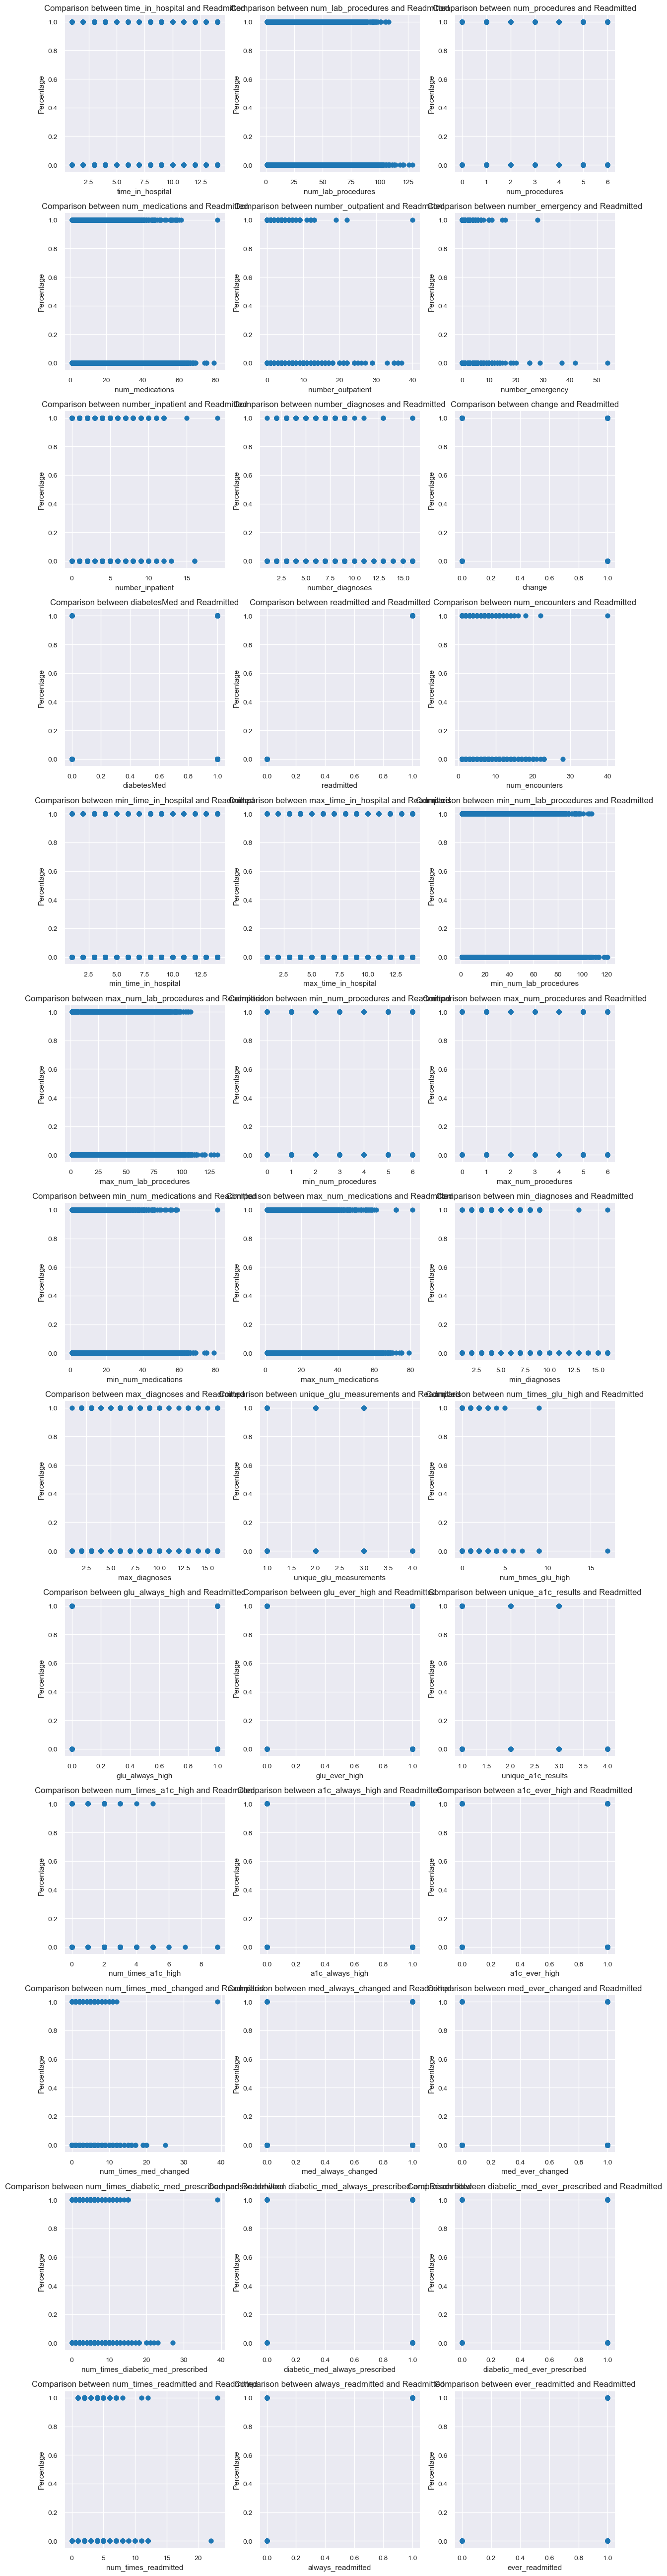

In [10]:
n_cols = 3  # You can choose the number of columns in your grid
n_rows = (len(int_columns) + n_cols - 1) // n_cols  # This ensures you have enough rows

# Create a figure and a set of subplots
fig, axes = plt.subplots(n_rows, n_cols, figsize=(4 * n_cols, 4 * n_rows))
fig.tight_layout(pad=5.0)

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Iterate over the columns and create a bar plot for each
for i, col in enumerate(int_columns):
    # Group by the current column and 'readmitted', then count occurrences
    axes[i].scatter(df[col], df['readmitted'])
    print(f'corelation coef between {col} and readmitted is :' , np.corrcoef(df[col], df['readmitted'])[1][0])
    axes[i].set_title(f"Comparison between {col} and Readmitted")
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Percentage')

# Hide any unused axes if the number of object columns isn't a multiple of n_cols
for j in range(i + 1, len(axes)):
    axes[j].axis('off')

# Adjust layout to prevent overlap
plt.tight_layout()

# Show the plot
plt.show()

corelation coef between time_in_hospital and readmitted is : 0.04942828050774179
corelation coef between num_lab_procedures and readmitted is : 0.04939732893160397
corelation coef between num_procedures and readmitted is : -0.007931851973218971
corelation coef between num_medications and readmitted is : 0.03761175108803213
corelation coef between number_outpatient and readmitted is : 0.021585694017650713
corelation coef between number_emergency and readmitted is : 0.03529132936771515
corelation coef between number_inpatient and readmitted is : 0.13855750439104733
corelation coef between number_diagnoses and readmitted is : 0.05515785003871148
corelation coef between change and readmitted is : 0.01063016409356728
corelation coef between diabetesMed and readmitted is : 0.020604213315508907
corelation coef between readmitted and readmitted is : 1.0
corelation coef between num_encounters and readmitted is : 0.0680579778731362
corelation coef between min_time_in_hospital and readmitted is :

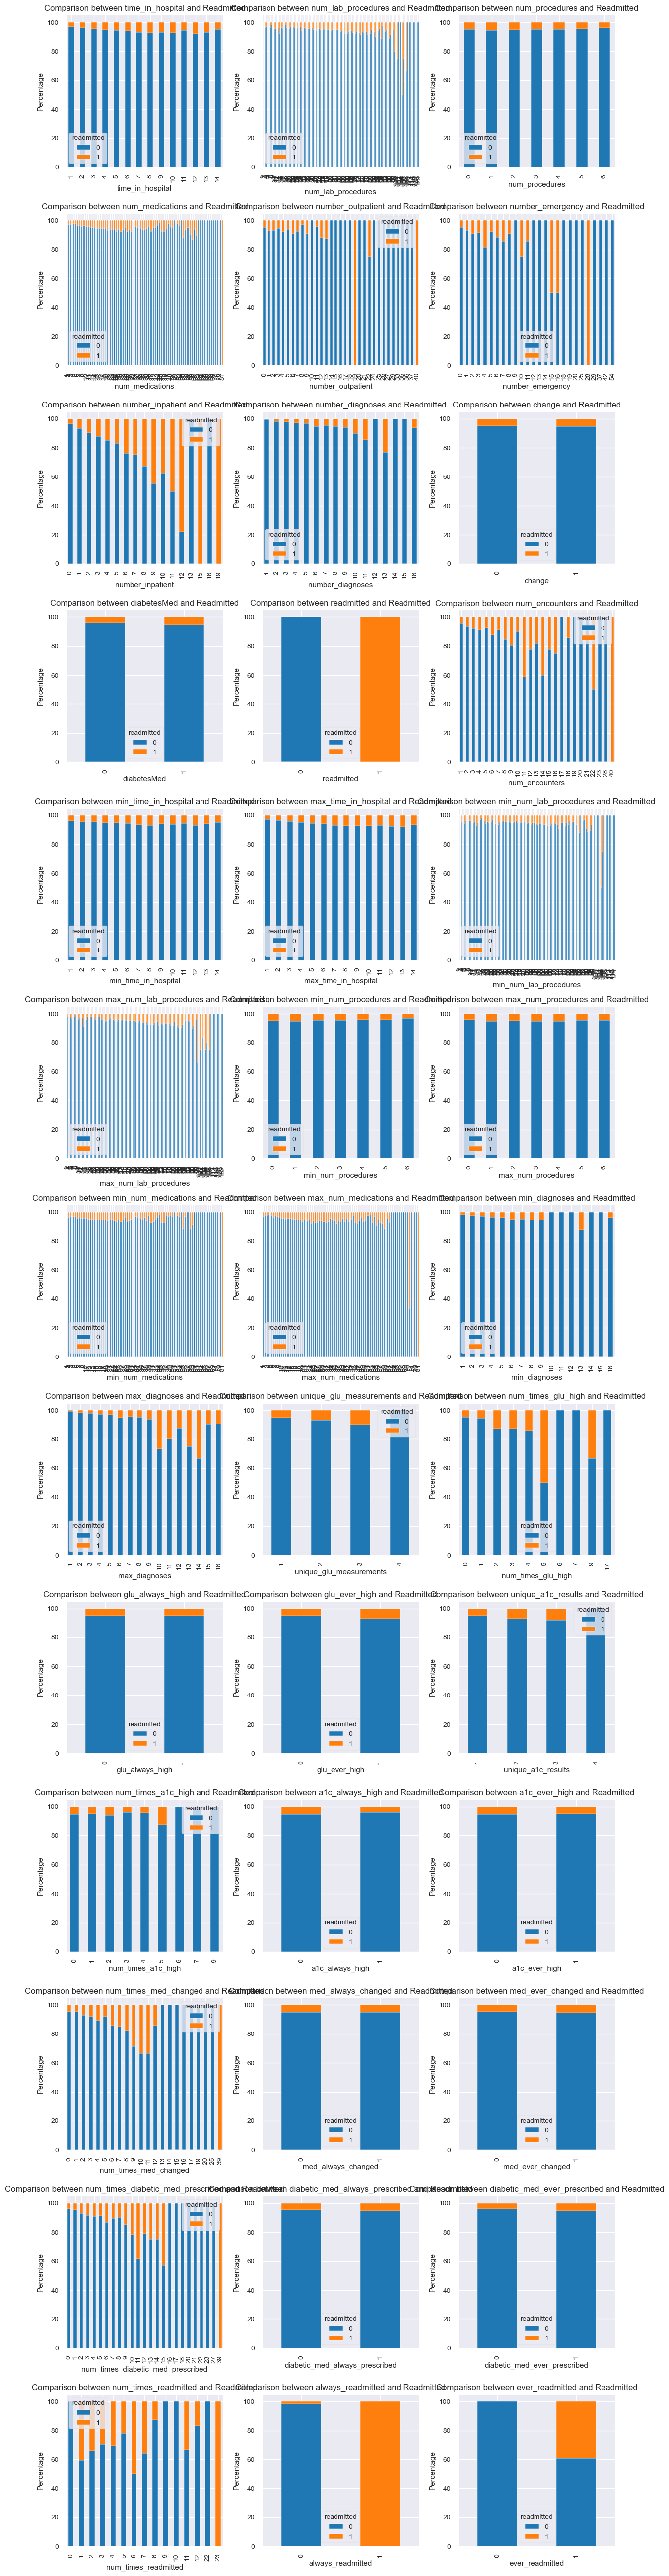

In [46]:
n_cols = 3  # You can choose the number of columns in your grid
n_rows = (len(int_columns) + n_cols - 1) // n_cols  # This ensures you have enough rows

# Create a figure and a set of subplots
fig, axes = plt.subplots(n_rows, n_cols, figsize=(4 * n_cols, 4 * n_rows))
fig.tight_layout(pad=5.0)

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Iterate over the columns and create a bar plot for each
for i, col in enumerate(int_columns):
    # Group by the current column and 'readmitted', then count occurrences
    grouped_data = df.groupby([ col, 'readmitted' ]).size().unstack()
    grouped_data_percentages = grouped_data.div(grouped_data.sum(axis=1), axis=0) * 100
    # print(grouped_data_percentages)

    # Plotting on the designated subplot
    grouped_data_percentages.plot(kind='bar', stacked=True, ax=axes[i])


    print(f'corelation coef between {col} and readmitted is :' , np.corrcoef(df[col], df['readmitted'])[1][0])
    axes[i].set_title(f"Comparison between {col} and Readmitted")
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Percentage')

# Hide any unused axes if the number of object columns isn't a multiple of n_cols
for j in range(i + 1, len(axes)):
    axes[j].axis('off')

# Adjust layout to prevent overlap
plt.tight_layout()

# Show the plot
plt.show()

In [ ]:
int_df = df.select_dtypes(include=['int', 'int64'])

# Calculate the correlation matrix
corr_matrix = int_df.corr()
threshold=0.5

high_corr= corr_matrix[(corr_matrix>threshold) & (corr_matrix!=0)]

filtered_corr= high_corr.dropna(axis=0, how='all').dropna(axis=1, how='all')

print(filtered_corr)

In [ ]:
# Set your threshold
threshold = 0.5

# Calculate the correlation matrix
int_df = df.select_dtypes(include=['int', 'int64'])
corr_matrix = int_df.corr()

# Apply the threshold to the correlation matrix and find pairs with high correlation
high_corr_pairs = (corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
                   .stack()
                   .reset_index())
high_corr_pairs.columns = ['col1', 'col2', 'corr_value']

# Filter out the pairs with correlation above the threshold
high_corr_pairs = high_corr_pairs[high_corr_pairs['corr_value'] > threshold]

# Print out the high correlation pairs
for _, row in high_corr_pairs.iterrows():
    print(f"{row['col1']} and {row['col2']} are highly correlated with a correlation coefficient of {row['corr_value']:.2f}")


In [47]:
# Set your threshold
upper_threshold = 0.99
lower_threshold=0.5

# Calculate the correlation matrix
int_df = df.select_dtypes(include=['int', 'int64'])
corr_matrix = int_df.corr()

# Apply the threshold to the correlation matrix and find pairs with high correlation
high_corr_pairs = (corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
                   .stack()
                   .reset_index())
high_corr_pairs.columns = ['col1', 'col2', 'corr_value']

# Filter out the pairs with correlation above the threshold
high_corr_pairs = high_corr_pairs[(high_corr_pairs['corr_value'] > lower_threshold )& (high_corr_pairs['corr_value'] < upper_threshold ) ]
high_corr_pairs.sort_values('corr_value',ascending=False)


,col1,col2,corr_value
297,number_diagnoses,max_diagnoses,0.952
370,diabetesMed,diabetic_med_ever_prescribed,0.927
715,num_times_a1c_high,a1c_ever_high,0.924
127,num_procedures,min_num_procedures,0.921
369,diabetesMed,diabetic_med_always_prescribed,0.920
338,change,med_ever_changed,0.915
165,num_medications,max_num_medications,0.913
337,change,med_always_changed,0.910
296,number_diagnoses,min_diagnoses,0.908
90,num_lab_procedures,max_num_lab_procedures,0.907


Alot of our dataset has data for patients where the patient only visited the hospital once and hence we see that for alot of the aggregate values on the patient level have high corelation with each other. for example:
if a patient spend 10 days in a hospital during their first visit.

In [49]:

df['num_times_readmitted'].value_counts() , df['num_times_readmitted'].value_counts()/len(df)

(num_times_readmitted
 0     61185
 1      7277
 2      1041
 3       290
 4        94
 5        41
 6        24
 7        14
 8         8
 12        6
 11        3
 10        3
 9         2
 22        1
 23        1
 Name: count, dtype: int64,
 num_times_readmitted
 0     8.742e-01
 1     1.040e-01
 2     1.487e-02
 3     4.143e-03
 4     1.343e-03
 5     5.858e-04
 6     3.429e-04
 7     2.000e-04
 8     1.143e-04
 12    8.573e-05
 11    4.286e-05
 10    4.286e-05
 9     2.858e-05
 22    1.429e-05
 23    1.429e-05
 Name: count, dtype: float64)

In [45]:
df['readmitted'].value_counts() , df['readmitted'].value_counts()/len(df)

(readmitted
 0    66521
 1     3469
 Name: count, dtype: int64,
 readmitted
 0    0.95
 1    0.05
 Name: count, dtype: float64)

We have 66521 (95%) patients that were not readmitted within 30 days of their visit and 3469 (5%) patients that were readmitted within 30 days of their visit. There is a clear class imbalance in our response variable.

in a hopsital setting, we would expect the majority of patients to not be readdmited within 30 days of their visit, and so our class imbalance is representative that.

In [16]:
for i in df:
    print(df[i].value_counts())

patient_nbr
135          1
76710888     1
76723020     1
76720941     1
76719078     1
            ..
26145936     1
26147637     1
26389431     1
26420373     1
189502619    1
Name: count, Length: 69990, dtype: int64
race
Caucasian          52352
AfricanAmerican    12656
UNK                 1850
Hispanic            1491
Other               1138
Asian                503
Name: count, dtype: int64
gender
Female             37237
Male               32750
Unknown/Invalid        3
Name: count, dtype: int64
age
[70-80)     17706
[60-70)     15645
[80-100)    13271
[50-60)     12235
[0-50)      11133
Name: count, dtype: int64
admission_type_id
Emergency    36098
Elective     13744
Urgent       12831
Other         7317
Name: count, dtype: int64
discharge_disposition_id
Home               43721
SNF                 9511
Home w/ Service     8621
Other               8137
Name: count, dtype: int64
admission_source_id
Emergency Room        37757
Physician Referral    21181
Other                 1105